In [1]:
import pandas as pd

In [2]:
# Load the data from the provided Excel file
file_path = 'data/Stage 1 assessment data.xlsx'

# Since we don't know the sheet names or structure, let's start by loading any sheet to inspect the data
try:
    # Attempt to read the first sheet to inspect the data
    df = pd.read_excel(file_path, sheet_name=0)
    # Display the first few rows to understand the structure
    df.head()
except Exception as e:
    error = str(e)

df.head() if 'df' in locals() else error


,EURUSD,Rate,Unnamed: 2,EURSEK,Rate.1
0,2010-02-01,1.3929,NaN,2010-01-01,10.2575
1,2010-02-02,1.3963,NaN,2010-01-04,10.1680
2,2010-02-03,1.3899,NaN,2010-01-05,10.2210
3,2010-02-04,1.3736,NaN,2010-01-06,10.1911
4,2010-02-05,1.3664,NaN,2010-01-07,10.1942


In [3]:
from datetime import datetime, timedelta

# Assuming the user's inputs
start_date = datetime(2010, 2, 1)
currency_pair = 'EURUSD'  # or 'EURSEK'
currency_column = 'Rate' if currency_pair == 'EURUSD' else 'Rate.1'
date_column = currency_pair

# Filter data for the selected currency pair starting from the start date
filtered_data = df[[date_column, currency_column]].dropna()
filtered_data = filtered_data[filtered_data[date_column] >= start_date]

# Calculate the rates for the next 12 months (assuming the 1st of each month as per requirement)
calculation_dates = [start_date + timedelta(days=30*i) for i in range(1, 13)]
achieved_rates_p1 = []
achieved_rates_p2 = []
daily_rates = []

start_rate = filtered_data[filtered_data[date_column] == start_date][currency_column].values[0]

for date in calculation_dates:
    # Find the closest date in the data to our calculation date
    closest_date = filtered_data.iloc[(filtered_data[date_column]-date).abs().argsort()[:1]]
    daily_rate = closest_date[currency_column].values[0]
    daily_rates.append(daily_rate)

    # Product 1 Achieved Rate
    achieved_rate_p1 = start_rate * 0.95  # 5% lower than the start rate
    achieved_rates_p1.append(achieved_rate_p1)

    # Product 2 Achieved Rate
    strike_rate = start_rate * 0.97  # 3% lower than the start rate
    if daily_rate < strike_rate:
        achieved_rate_p2 = strike_rate
    else:
        achieved_rate_p2 = (strike_rate + daily_rate) / 2
    achieved_rates_p2.append(achieved_rate_p2)

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Date': calculation_dates,
    'Daily Rate': daily_rates,
    'Achieved Rate Product 1': achieved_rates_p1,
    'Achieved Rate Product 2': achieved_rates_p2
})

plot_data.head()

,Date,Daily Rate,Achieved Rate Product 1,Achieved Rate Product 2
0,2010-03-03,1.3700,1.323255,1.360556
1,2010-04-02,1.3504,1.323255,1.351113
2,2010-05-02,1.3194,1.323255,1.351113
3,2010-06-01,1.2227,1.323255,1.351113
4,2010-07-01,1.2519,1.323255,1.351113


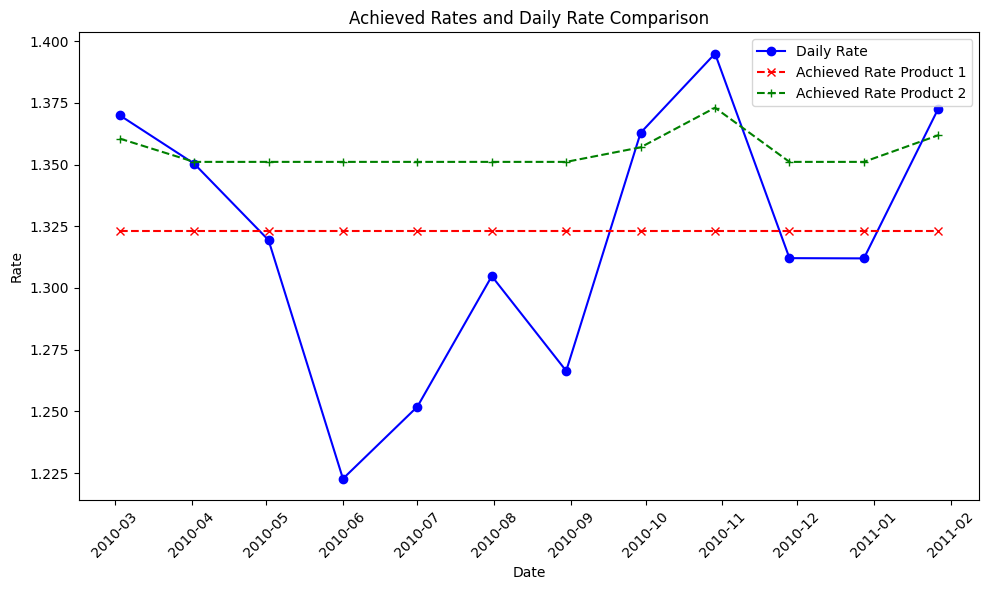

In [5]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(plot_data['Date'], plot_data['Daily Rate'], label='Daily Rate', marker='o', linestyle='-', color='blue')
plt.plot(plot_data['Date'], plot_data['Achieved Rate Product 1'], label='Achieved Rate Product 1', marker='x', linestyle='--', color='red')
plt.plot(plot_data['Date'], plot_data['Achieved Rate Product 2'], label='Achieved Rate Product 2', marker='+', linestyle='--', color='green')

plt.title('Achieved Rates and Daily Rate Comparison')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save the plot to a file
plot_file_path = 'data/achieved_rates_comparison.png'
plt.savefig(plot_file_path)
plt.show()

# plot_file_path
